In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('ai4i2020.csv')
print(data.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [6]:
print(data.shape)

(10000, 14)


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [42]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


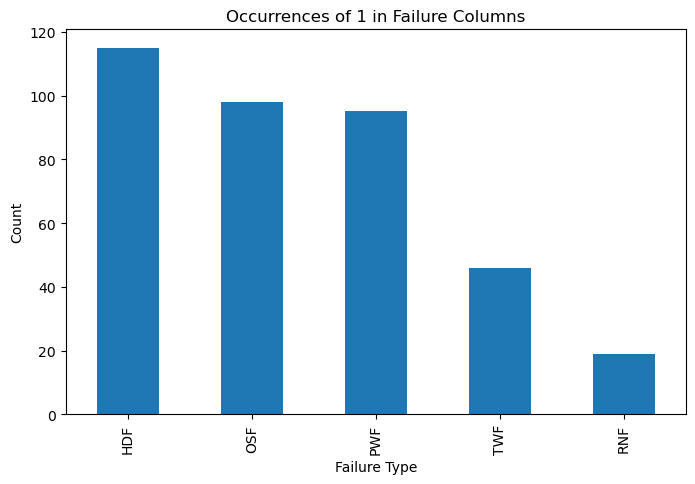

HDF    115
OSF     98
dtype: int64


In [50]:
import matplotlib.pyplot as plt
failure_counts = data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
sorted_failures = failure_counts.sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sorted_failures.plot(kind='bar')
plt.title('Occurrences of 1 in Failure Columns')
plt.ylabel('Count')
plt.xlabel('Failure Type')
plt.show()
top_2_failures = sorted_failures.head(2)
print(top_2_failures)

In [52]:
data.drop(columns=['UDI','Product ID','TWF', 'RNF'], inplace=True)

<Figure size 1200x800 with 0 Axes>

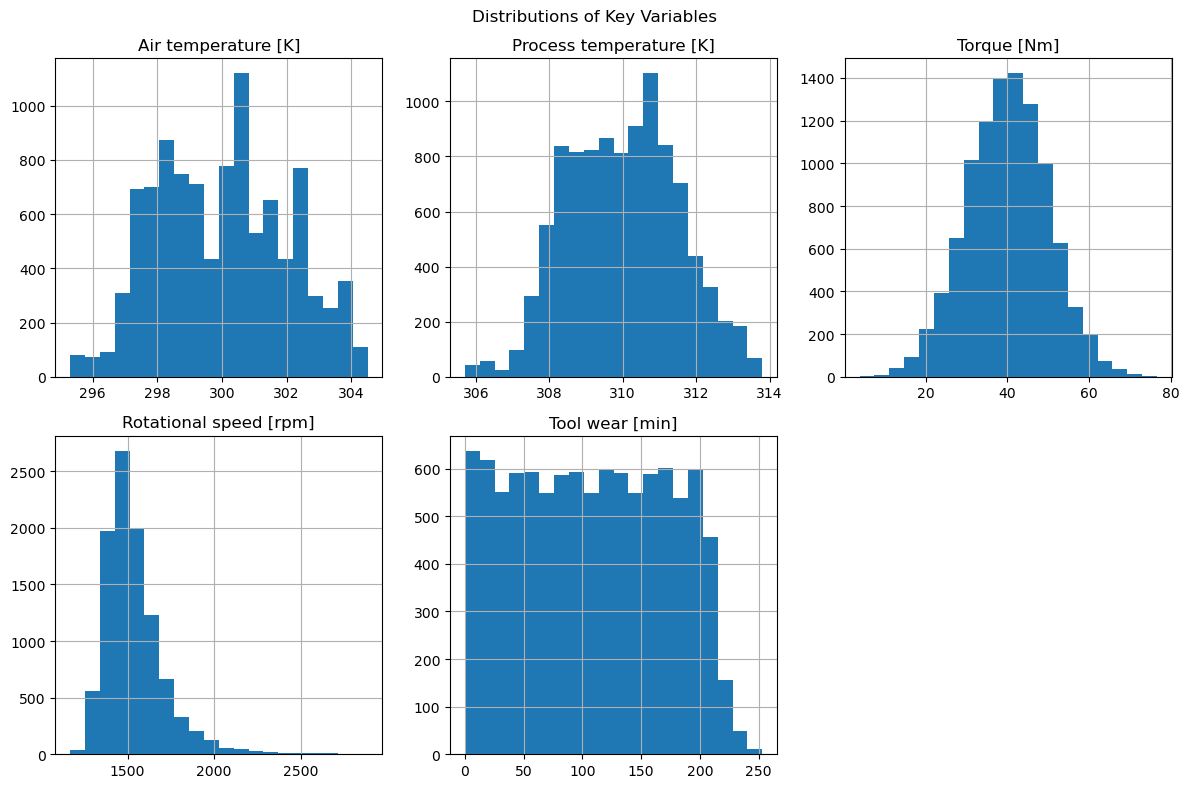

In [54]:
plt.figure(figsize=(12, 8))
data[['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
      'Rotational speed [rpm]', 'Tool wear [min]']].hist(bins=20, layout=(2, 3), figsize=(12, 8))
plt.suptitle('Distributions of Key Variables')
plt.tight_layout()
plt.show()

In [56]:
data = data.loc[data['Rotational speed [rpm]'] <= 1750]
print(data.shape)

(9029, 10)


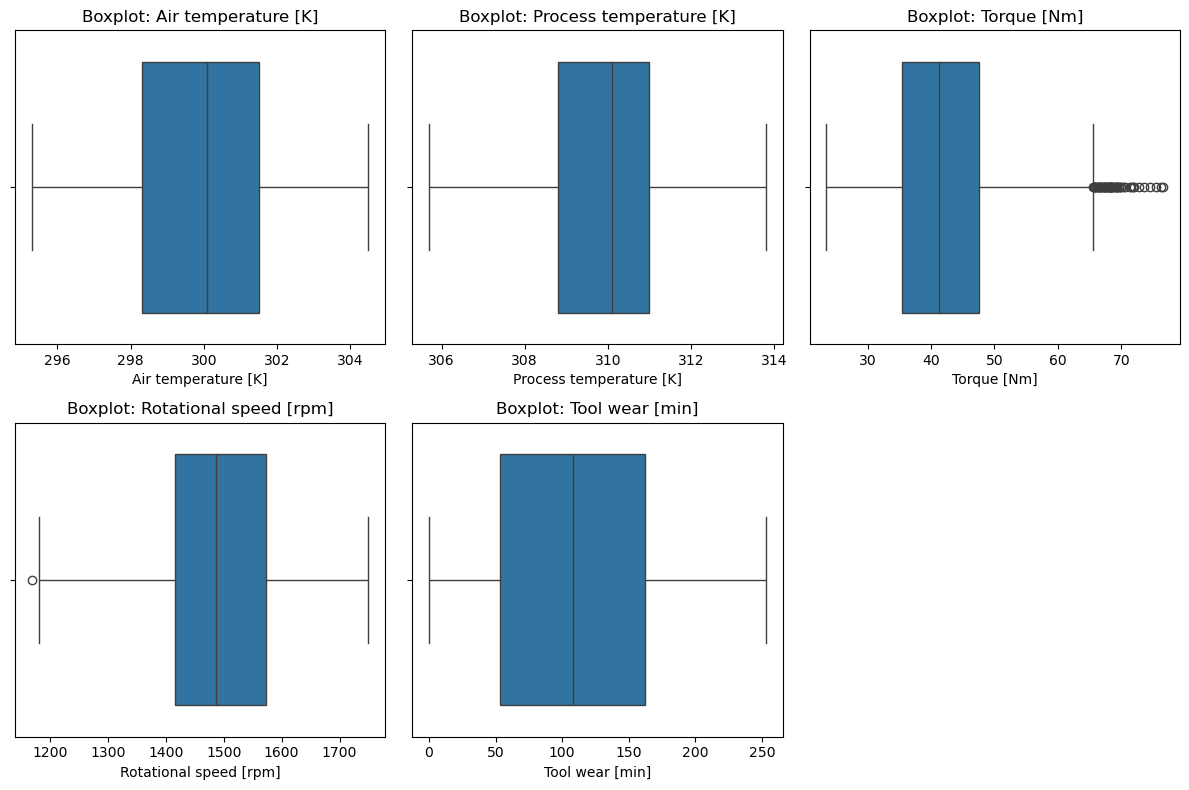

In [58]:
columns = ['Air temperature [K]', 'Process temperature [K]', 
           'Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]']
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot: {column}')
plt.tight_layout()
plt.show()

In [54]:
print(data.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [66]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder

In [68]:
minmax_columns = ['Air temperature [K]', 'Process temperature [K]']
standard_columns = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
scaler_minmax = MinMaxScaler().set_output(transform="pandas")
scaler_standard = StandardScaler().set_output(transform="pandas")



In [76]:
data_minmax = scaler_minmax.fit_transform(data[minmax_columns])
data_minmax

,Air temperature [K],Process temperature [K]
0,0.304348,0.358025
1,0.315217,0.370370
2,0.304348,0.345679
3,0.315217,0.358025
4,0.315217,0.370370
...,...,...
9995,0.380435,0.333333
9996,0.391304,0.333333
9997,0.402174,0.358025
9998,0.402174,0.370370


In [78]:
data_standard = scaler_standard.fit_transform(data[standard_columns])

data_standard

,Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.499948,0.110823,-1.696196
1,-0.797390,0.523539,-1.649019
2,0.019116,0.889086,-1.617567
3,-0.570583,-0.278308,-1.586116
4,-0.797390,-0.219349,-1.554664
...,...,...,...
9995,0.980780,-1.457495,-1.476035
9996,1.234804,-1.186282,-1.428858
9997,1.352744,-0.997612,-1.350229
9998,-0.797390,0.782960,-1.303052


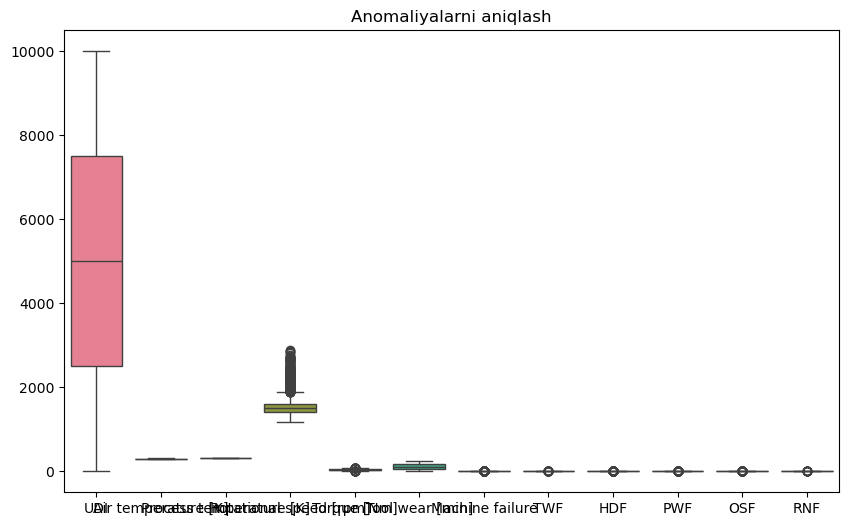

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Anomaliyalarni aniqlash')
plt.show()


In [10]:
# Tavsifiy statistika
print(data.describe())


               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

In [25]:
#Vizualizatsiya

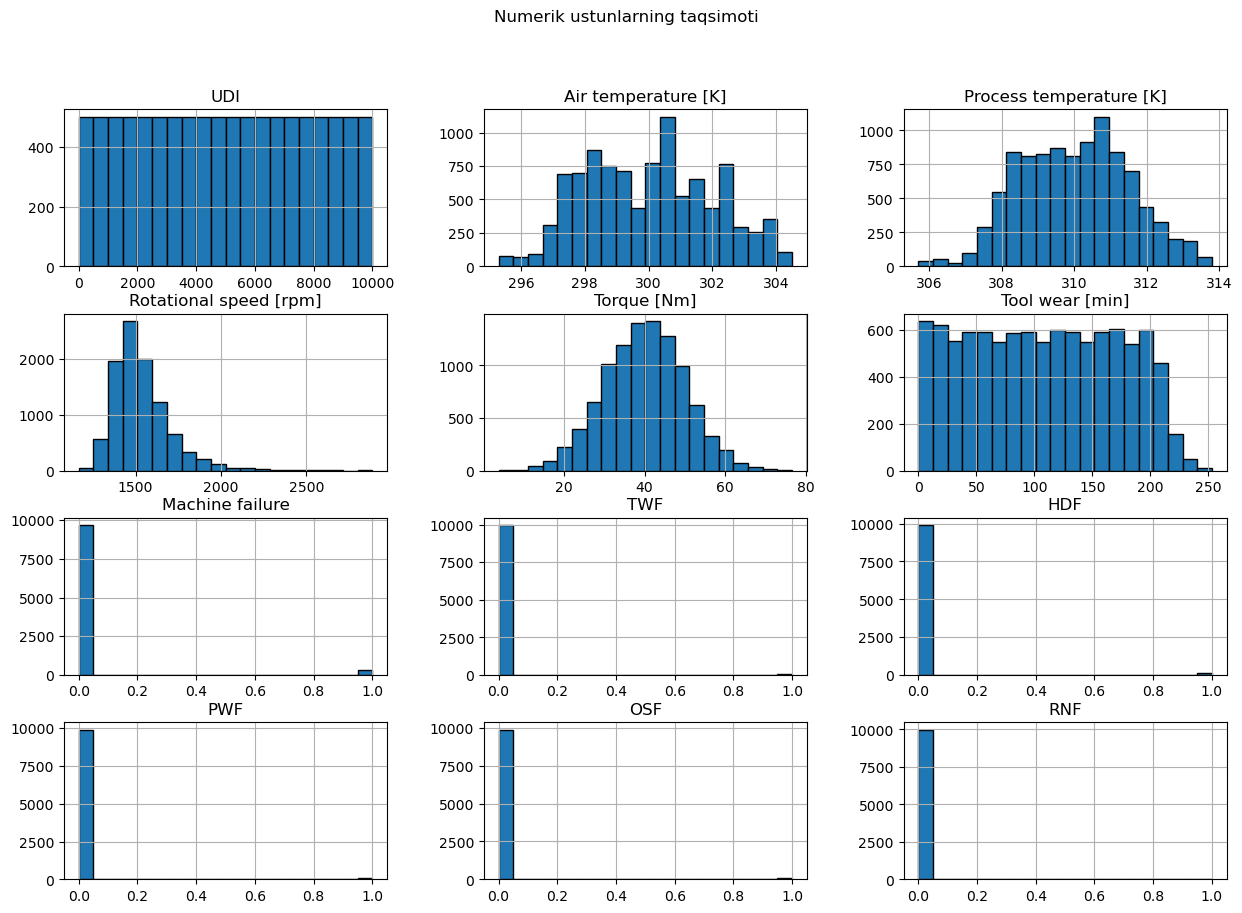

In [12]:
# Taqsimotni ko'rsatish
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Numerik ustunlarning taqsimoti')
plt.show()


In [29]:
#korelyatsiya tahlili

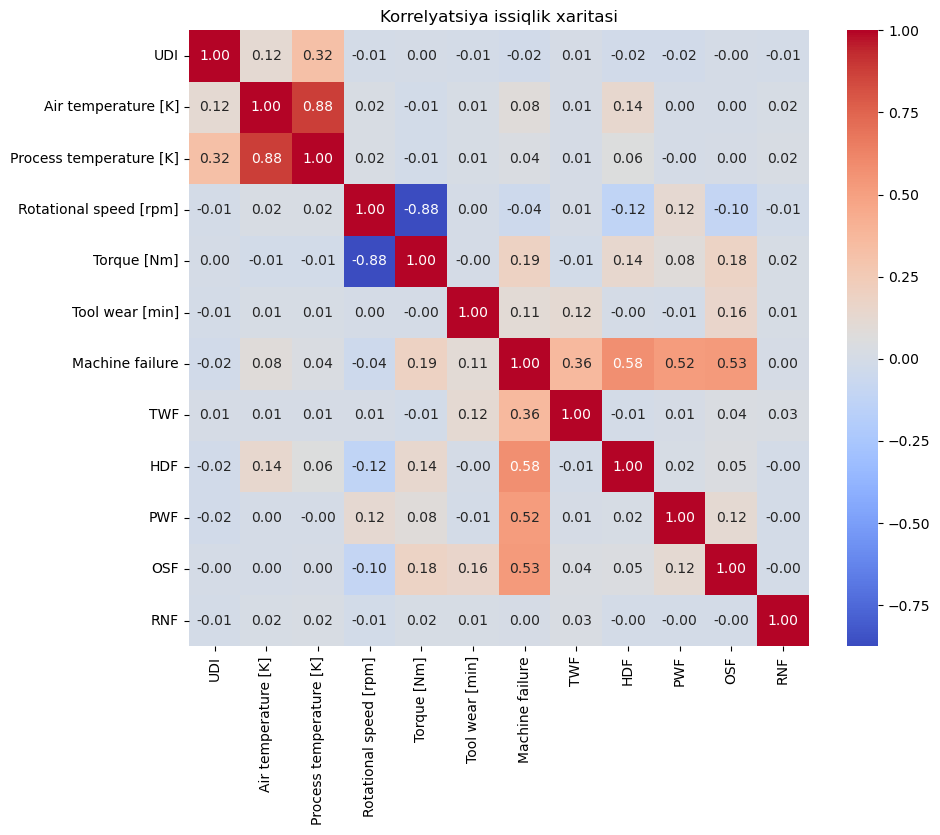

In [39]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelyatsiya issiqlik xaritasi')
plt.show()


In [41]:
#kategorik ma'lumotlar tahlil qilish

In [14]:
# Kategorik ustunlarning qiymatlarini sanash
for col in data.select_dtypes(include=['object']):
    print(data[col].value_counts())



Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: count, Length: 10000, dtype: int64
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: count, Length: 10000, dtype: int64


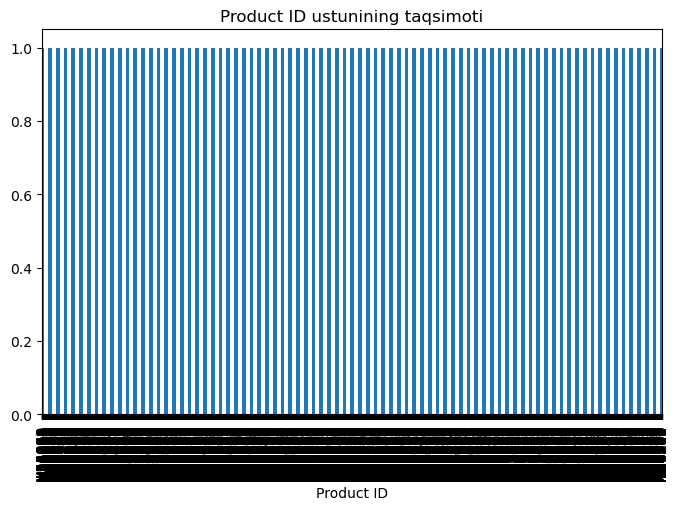

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


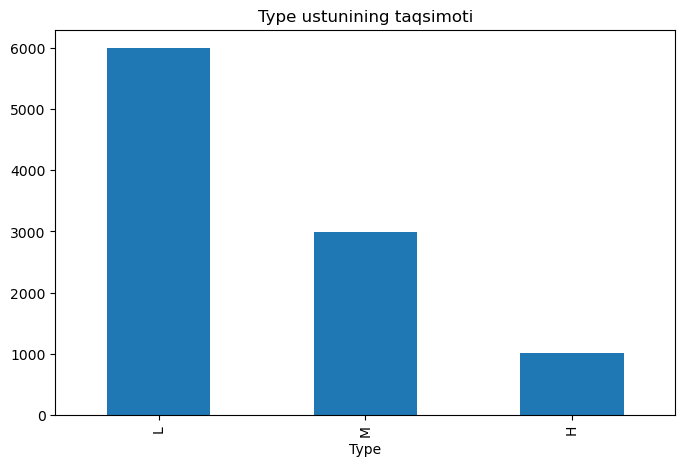

In [74]:
#anomaliyalarni chuqur tahlil qilis

In [80]:

data1 = data[[ 'Machine failure', 'HDF', 'PWF', 'OSF']]
data1

,Machine failure,HDF,PWF,OSF
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
9995,0,0,0,0
9996,0,0,0,0
9997,0,0,0,0
9998,0,0,0,0


<Figure size 1200x800 with 0 Axes>

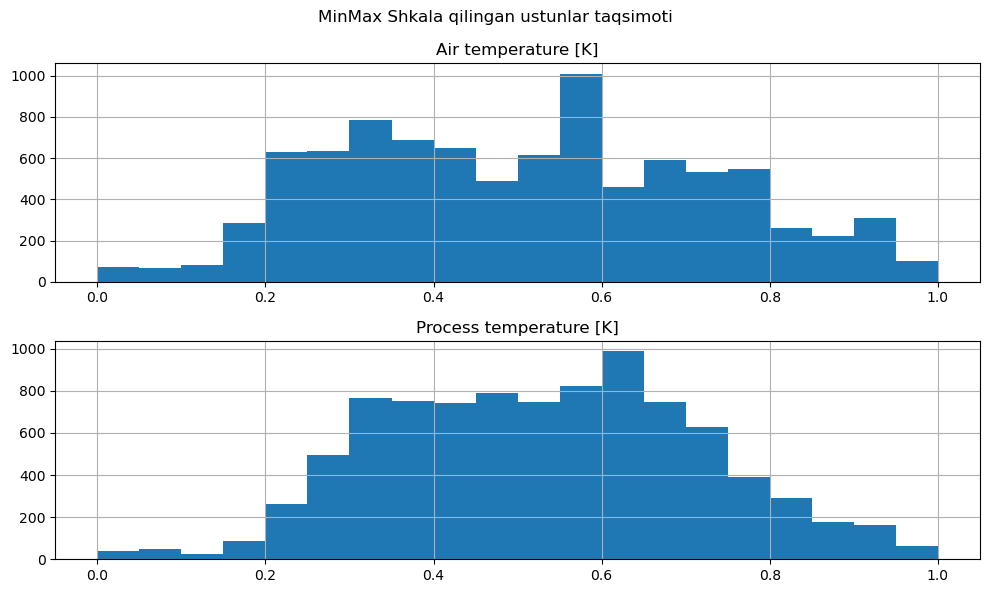

In [84]:
plt.figure(figsize=(12, 8))
data_minmax.hist(bins=20, layout=(2, 1), figsize=(10, 6))
plt.suptitle('MinMax Shkala qilingan ustunlar taqsimoti')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

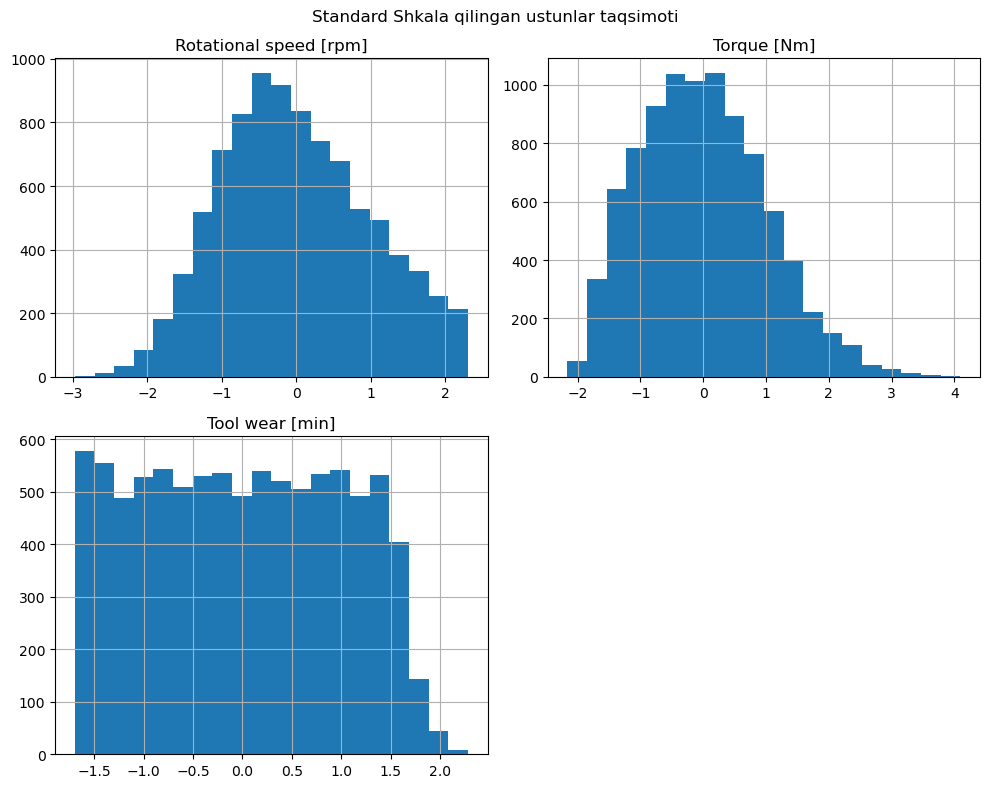

In [86]:
plt.figure(figsize=(12, 8))
data_standard.hist(bins=20, layout=(2, 2), figsize=(10, 8))
plt.suptitle('Standard Shkala qilingan ustunlar taqsimoti')
plt.tight_layout()
plt.show()


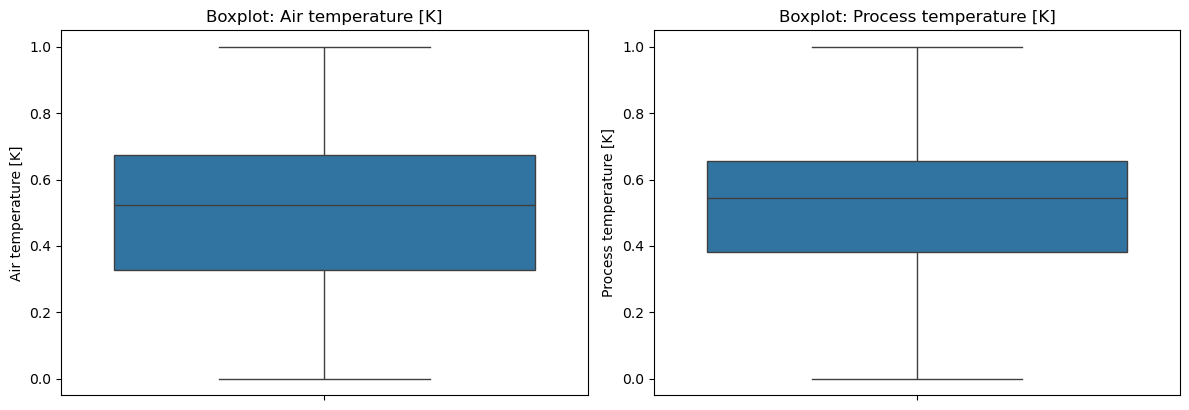

In [88]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data_minmax.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data_minmax[column])
    plt.title(f'Boxplot: {column}')
plt.tight_layout()
plt.show()

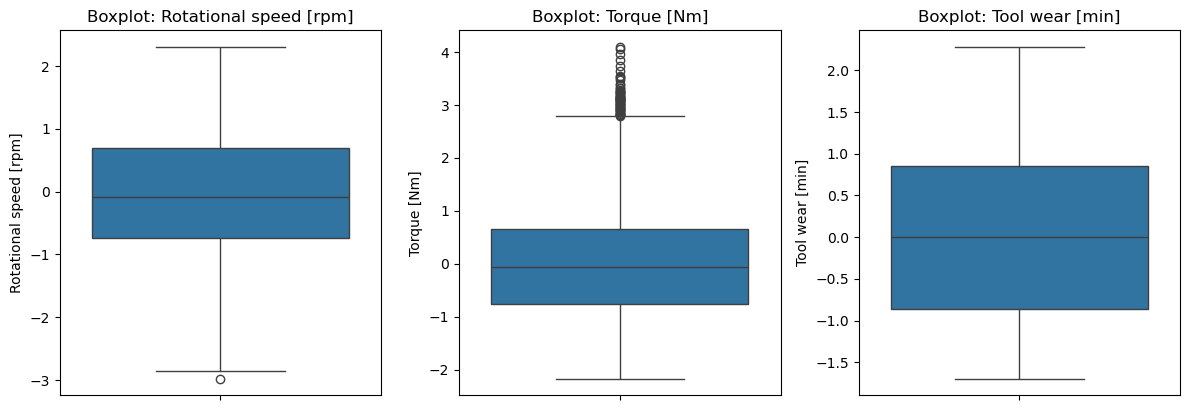

In [90]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data_standard.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data_standard[column])
    plt.title(f'Boxplot: {column}')
plt.tight_layout()
plt.show()


In [16]:
from scipy.stats import zscore
z_scores = np.abs(zscore(data.select_dtypes(include=['float64', 'int64'])))
print((z_scores > 3).sum(axis=0)) 

UDI                          0
Air temperature [K]          0
Process temperature [K]      0
Rotational speed [rpm]     164
Torque [Nm]                 25
Tool wear [min]              0
Machine failure            339
TWF                         46
HDF                        115
PWF                         95
OSF                         98
RNF                         19
dtype: int64


In [70]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
outliers = iso.fit_predict(data.select_dtypes(include=['float64', 'int64']))
print(f"Anomaliyalar soni: {(outliers == -1).sum()}")


Anomaliyalar soni: 500


In [ ]:
#Bosh komponentlar tahlili: katta o'lchovli ma'lumotlari qisqartirish

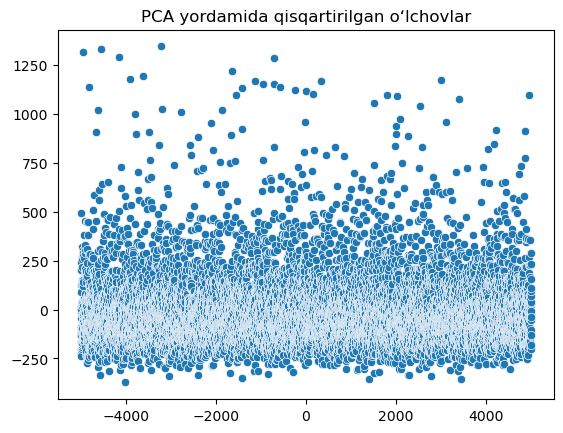

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.select_dtypes(include=['float64', 'int64']))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1])
plt.title('PCA yordamida qisqartirilgan o‘lchovlar')
plt.show()


In [3]:
#malumotlarni tayyorlash

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # train_test_split funksiyasini import qilish
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report


In [34]:
#regression model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Regression RMSE: {rmse}")
print(f"Regression MAE: {mae}")


In [38]:
#logistik regression

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_cls, y_train_cls)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_resampled, y_resampled)
y_pred_cls_log = log_reg.predict(X_test_cls)
print(classification_report(y_test_cls, y_pred_cls_log, zero_division=0))


In [33]:
#random forest

In [ ]:
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_cls, y_train_cls)
y_pred_cls_rf = rf_cls.predict(X_test_cls)
accuracy_rf = accuracy_score(y_test_cls, y_pred_cls_rf)
print(f"Random Forest Aniqlik: {accuracy_rf}")
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls_rf))


In [39]:
#vizualizatsiya

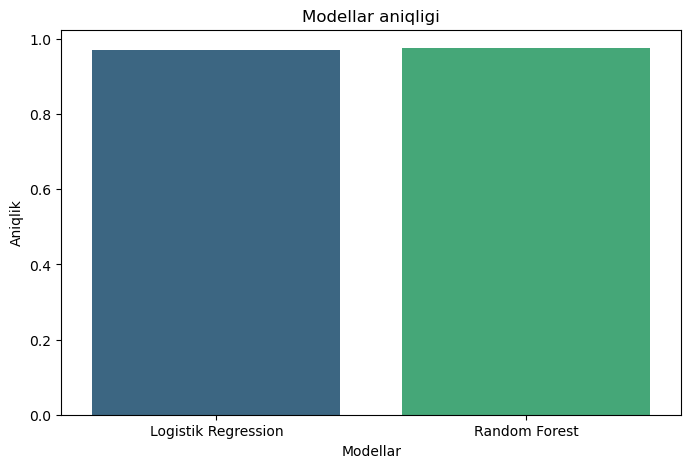

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
models = ['Logistik Regression', 'Random Forest']
accuracies = [0.9695, 0.976]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis", hue=models, dodge=False, legend=False)
plt.title("Modellar aniqligi")
plt.ylabel("Aniqlik")
plt.xlabel("Modellar")
plt.show()


In [90]:
import pandas as pd

data = pd.read_csv('ai4i2020.csv')
print(data.columns)


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
data = pd.read_csv('ai4i2020.csv')
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Machine failure']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10]  
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")
optimized_rf_model = RandomForestRegressor(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)
y_pred = optimized_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Optimallashtirilgan model natijalari: RMSE: {rmse}, MAE: {mae}")


Eng yaxshi parametrlar: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Optimallashtirilgan model natijalari: RMSE: 0.11316429950773196, MAE: 0.025453995992563382


In [ ]:
 #Random Forest modelini sozlash

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
data = pd.read_csv('ai4i2020.csv')
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Machine failure'] 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Optimallashtirilgan modelni yaratish

In [107]:

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10]  
}

# Modelni sozlash
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")


Eng yaxshi parametrlar: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
#Tasniflash uchun optimallashtirish

In [113]:
optimized_rf_model = RandomForestRegressor(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)
y_pred = optimized_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Optimallashtirilgan model natijalari: RMSE: {rmse}, MAE: {mae}")


Optimallashtirilgan model natijalari: RMSE: 0.11316429950773196, MAE: 0.025453995992563382


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
param_grid_clf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
clf_model = RandomForestClassifier(random_state=42)
grid_search_clf = GridSearchCV(estimator=clf_model, param_grid=param_grid_clf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_clf.fit(X_train, y_train)
best_clf_params = grid_search_clf.best_params_
print(f"Eng yaxshi parametrlar: {best_clf_params}")

optimized_clf_model = RandomForestClassifier(**best_clf_params, random_state=42)
optimized_clf_model.fit(X_train, y_train)
y_pred_clf = optimized_clf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Tasniflash model aniqligi: {accuracy}")
print(classification_report(y_test, y_pred_clf))


Eng yaxshi parametrlar: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Tasniflash model aniqligi: 0.9835
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.83      0.57      0.68        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



In [83]:
#EDA
#asosidagi sozlanmagan model

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
data = pd.read_csv('ai4i2020.csv')
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Machine failure']
categorical_columns = X.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    X = pd.get_dummies(X, drop_first=True)
if y.dtypes == 'object':
    y = pd.get_dummies(y, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Sozlanmagan model natijalari: RMSE: {rmse}, MAE: {mae}")


Sozlanmagan model natijalari: RMSE: 0.11418296720614682, MAE: 0.026414999999999998


In [90]:
#sozlangan model

In [92]:
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10]  

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")
optimized_rf_model = RandomForestRegressor(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)
y_pred_optimized = optimized_rf_model.predict(X_test)
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
print(f"Sozlangan model natijalari: RMSE: {rmse_optimized}, MAE: {mae_optimized}")


Eng yaxshi parametrlar: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Sozlangan model natijalari: RMSE: 0.11316429950773196, MAE: 0.025453995992563382


In [96]:
#Smote

In [109]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
data = pd.read_csv('ai4i2020.csv')
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Machine failure'] 
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  
print(f"Modelning aniqligi (kross-validatsiya): {scores.mean():.2f}")



Modelning aniqligi (kross-validatsiya): 0.89


In [115]:
#Featurce Importance

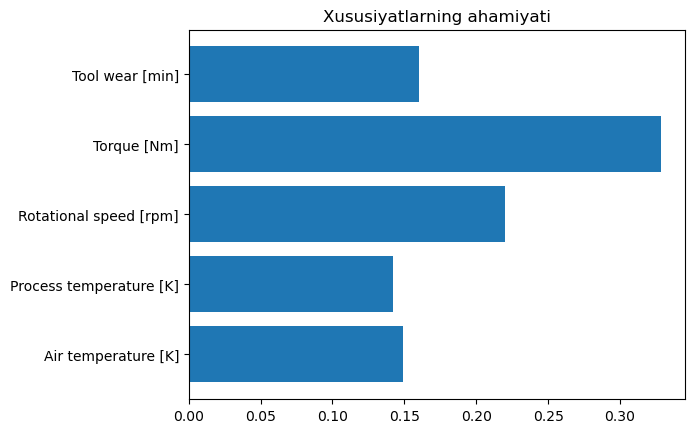

In [117]:
import matplotlib.pyplot as plt
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title('Xususiyatlarning ahamiyati')
plt.show()


In [30]:
from cryptography.fernet import Fernet

key = Fernet.generate_key()
cipher = Fernet(key)
encrypted_data = cipher.encrypt(b'original_data')


In [92]:
print(data.dtypes)

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
HDF                          int64
PWF                          int64
OSF                          int64
dtype: object
